## Install Packages

In [16]:
%pip install seaborn
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

sns.set_style("whitegrid")
import pandas as pd
import matplotlib.pyplot as plt

## Import CSV Files

In [21]:
df = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/train_data.csv")
df_test = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/test_data.csv")

In [22]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [23]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


## FEATURE SELECTION

In [24]:
# TRAIN dataset converted to digitized
## alternatively labelEncoder() can be used

In [25]:
    df_train = df[
        ["Hospital_code", "patientid", "Department", "Age", "Severity of Illness", "Type of Admission", "Stay"]].copy()
    # print("TRAIN DATA")
    # 0 ->  gynecology / 1 -> anesthesia / 2-> radiotherapy / 3 -> TB & Chest disease / 4 -> surgery
    # print(df["Department"].value_counts())
    df_train = df_train.replace(['gynecology'], '0')
    df_train = df_train.replace(['anesthesia'], '1')
    df_train = df_train.replace(['radiotherapy'], '2')
    df_train = df_train.replace(['TB & Chest disease'], '3')
    df_train = df_train.replace(['surgery'], '4')
    # print(df_train["Department"].value_counts())

    # 0 -> Moderate / 1 -> Minor / 2 -> Extreme / 3 -> Severity of Illness
    # print(df["Severity of Illness"].value_counts())
    df_train = df_train.replace(['Moderate'], '0')
    df_train = df_train.replace(['Minor'], '1')
    df_train = df_train.replace(['Extreme'], '2')
    # print(df_train["Severity of Illness"].value_counts())

    # 0 -> Trauma / 1 -> Emergency / 2 -> Urgent
    # print(df["Type of Admission"].value_counts())
    df_train = df_train.replace(['Trauma'], '0')
    df_train = df_train.replace(['Emergency'], '1')
    df_train = df_train.replace(['Urgent'], '2')
    # print(df_train["Type of Admission"].value_counts())

    # 0 -> 41-50 / 1 -> 31-40 / 2 -> 51-60 / 3 -> 21-30 / 4 -> 71-80 / 5 -> 61-70
    # / 6 -> 11-20 / 7 -> 81-90 / 8 -> 0-10 / 9 -> 91-100
    # print(df["Age"].value_counts())
    df_train = df_train.replace(['41-50'], '0')
    df_train = df_train.replace(['31-40'], '1')
    df_train = df_train.replace(['51-60'], '2')
    df_train = df_train.replace(['21-30'], '3')
    df_train = df_train.replace(['71-80'], '4')
    df_train = df_train.replace(['61-70'], '5')
    df_train = df_train.replace(['11-20'], '6')
    df_train = df_train.replace(['81-90'], '7')
    df_train = df_train.replace(['0-10'], '8')
    df_train = df_train.replace(['91-100'], '9')
    # print(df_train["Age"].value_counts())

    # 0 -> 21-30 / 1 -> 11-20 / 2 -> 31-40 / 3 -> 51-60 / 4 -> 0-10 / 5 -> 41-50
    # 6 -> 71-80 / 7 -> More than 100 Days /  8 -> 81-90 / 9 -> 91-100 / 10 -> 61-70
    # print(df["Stay"].value_counts())
    df_train = df_train.replace(['21-30'], '0')
    df_train = df_train.replace(['11-20'], '1')
    df_train = df_train.replace(['31-40'], '2')
    df_train = df_train.replace(['51-60'], '3')
    df_train = df_train.replace(['0-10'], '4')
    df_train = df_train.replace(['41-50'], '5')
    df_train = df_train.replace(['71-80'], '6')
    df_train = df_train.replace(['More than 100 Days'], '7')
    df_train = df_train.replace(['81-90'], '8')
    df_train = df_train.replace(['91-100'], '9')
    df_train = df_train.replace(['61-70'], '10')
    # print(df_train["Stay"].value_counts())

In [26]:
# TEST dataset converted to digitized
## alternatively labelEncoder() can be used

In [27]:
    df_test = df_test[
        ["Hospital_code", "patientid", "Department", "Age", "Severity of Illness", "Type of Admission"]].copy()

    # 0 ->  gynecology / 1 -> anesthesia / 2-> radiotherapy / 3 -> TB & Chest disease / 4 -> surgery
    # print(df_test["Department"].value_counts())
    df_test = df_test.replace(['gynecology'], '0')
    df_test = df_test.replace(['anesthesia'], '1')
    df_test = df_test.replace(['radiotherapy'], '2')
    df_test = df_test.replace(['TB & Chest disease'], '3')
    df_test = df_test.replace(['surgery'], '4')
    # print(df_test["Department"].value_counts())

    # 0 -> Moderate / 1 -> Minor / 2 -> Extreme / 3 -> Severity of Illness
    # print(df_test["Severity of Illness"].value_counts())
    df_test = df_test.replace(['Moderate'], '0')
    df_test = df_test.replace(['Minor'], '1')
    df_test = df_test.replace(['Extreme'], '2')
    # print(df_test["Severity of Illness"].value_counts())

    # 0 -> Trauma / 1 -> Emergency / 2 -> Urgent
    # print(df_test["Type of Admission"].value_counts())
    df_test = df_test.replace(['Trauma'], '0')
    df_test = df_test.replace(['Emergency'], '1')
    df_test = df_test.replace(['Urgent'], '2')
    # print(df_test["Type of Admission"].value_counts())

    # 0 -> 41-50 / 1 -> 31-40 / 2 -> 51-60 / 3 -> 21-30 / 4 -> 71-80 / 5 -> 61-70
    # / 6 -> 11-20 / 7 -> 81-90 / 8 -> 0-10 / 9 -> 91-100
    # print(df_test["Age"].value_counts())
    df_test = df_test.replace(['41-50'], '0')
    df_test = df_test.replace(['31-40'], '1')
    df_test = df_test.replace(['51-60'], '2')
    df_test = df_test.replace(['21-30'], '3')
    df_test = df_test.replace(['71-80'], '4')
    df_test = df_test.replace(['61-70'], '5')
    df_test = df_test.replace(['11-20'], '6')
    df_test = df_test.replace(['81-90'], '7')
    df_test = df_test.replace(['0-10'], '8')
    df_test = df_test.replace(['91-100'], '9')
    # print(df_test["Age"].value_counts())

## MLOPS

In [60]:
    combined = [df_train, df_test]
    train = combined[0]
    test = combined[1]

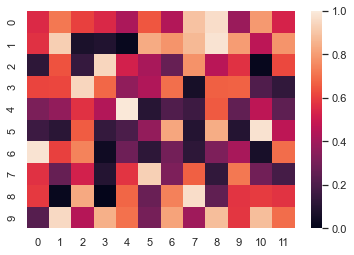

In [30]:
    np.random.seed(0)
    sns.set()
    combined[0] = np.random.rand(10, 12)
    ax = sns.heatmap(combined[0], vmin=0, vmax=1)
    plt.show()

In [31]:
    X_train = train.drop("Stay", axis=1)
    Y_train = train["Stay"]
    X_test = test.copy()

In [57]:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    print("KNN:",acc_knn)

KNN: 54.86


In [56]:
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
    print("Decision Tree:", acc_decision_tree)

Decision Tree: 96.39


In [34]:
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, Y_train)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("Random Forest: ",acc_random_forest)

Random Forest:  96.39


In [45]:
    logreg = LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred=logreg.predict(X_test)
    logreg.score(X_train, Y_train)
    acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
    print("Logisctic Regression", acc_logreg)

Logisctic Regression 27.0


In [61]:
    naivebayes = GaussianNB()
    naivebayes.fit(X_train, Y_train)
    y_pred = naivebayes.predict(X_test)
    naivebayes.score(X_train, Y_train)
    acc_bayes = round(naivebayes.score(X_train, Y_train) * 100, 2)
    print("Linear Regression", acc_bayes)

Linear Regression 27.73


<AxesSubplot:>

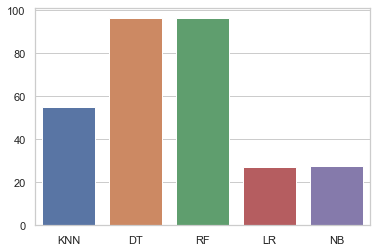

In [62]:
sns.barplot(x= ['KNN','DT','RF', 'LR', 'NB'],y= [acc_knn, acc_decision_tree,acc_random_forest, acc_logreg, acc_bayes])

## FEATURE EXTRACTION

In [36]:
#  -----------------------------FEATURE EXTRACTION WITH TRAIN --------------------------------------
## Severity of Illness -> Extreme and Age -> 61... if greater then create column named priority and 1 will be set 
## otherwise priority status will be 0

In [37]:
    df_copy_train = df_train
    options_sol = ['2']
    rslt_df = df_copy_train.loc[df_copy_train['Severity of Illness'].isin(options_sol)]

    options_age = ['4', '5', '7', '9']
    rslt_df_age = df_copy_train.loc[df_copy_train['Age'].isin(options_age)]
    
    df_feature_ext = df_copy_train.copy()
    
    print("rslt_df size:" + str(rslt_df.shape))
    common = rslt_df.merge(rslt_df_age, left_index=True, right_index=True, how='outer', suffixes=('', '_drop'))
    common.drop(common.filter(regex='_y$').columns.tolist(), axis=1, inplace=False)
    # print("merged two column : ", common["Stay"])
    # print(common.isnull().sum())
    common.loc[common["Hospital_code"].isnull(), "Hospital_code"] = "0"
    common.loc[common["patientid"].isnull(), "patientid"] = "0"
    common.loc[common["Department"].isnull(), "Department"] = "0"
    common.loc[common["Age"].isnull(), "Age"] = "0"
    common.loc[common["Severity of Illness"].isnull(), "Severity of Illness"] = "0"
    common.loc[common["Type of Admission"].isnull(), "Type of Admission"] = "0"
    common.loc[common["Stay"].isnull(), "Stay"] = "0"
    # print(common.isnull().sum())

    f = open("train_join.csv", "w")
    f.write("Hospital_code,patientid,Department,Age,Severity of Illness,Type of Admission,priority,Stay\n")
    for (i, row) in common.iterrows():
        if common["Hospital_code"][i] == "0" and common["patientid"][i] == "0" and common["Department"][i] == "0" and \
                common["Age"][i] == "0" and common["Severity of Illness"][i] == "0" and common["Type of Admission"][
            i] == "0" and common["Stay"][i] == "0":
            row["Hospital_code"] = df_copy_train["Hospital_code"][i]
            row["patientid"] = df_copy_train["patientid"][i]
            row["Department"] = df_copy_train["Department"][i]
            row["Age"] = df_copy_train["Age"][i]
            row["Severity of Illness"] = df_copy_train["Severity of Illness"][i]
            row["Type of Admission"] = df_copy_train["Type of Admission"][i]
            row["Stay"] = df_copy_train["Stay"][i]

            # row["priority"] = "NO"
            row["priority"] = "0"

        else:
            # row["priority"] = "YES"
            row["priority"] = "1"

        f.write(str(row["Hospital_code"]) + "," + str(row["patientid"]) + "," + str(row["Department"]) + "," + str(
            row["Age"]) + "," + str(row["Severity of Illness"]) + "," + str(row["Type of Admission"]) + "," +
                str(row["priority"]) + "," + str(row["Stay"]) + "\n")
    file = open("train_join.csv", "r")
    df_common = pd.read_csv(file)
    df_common.head()

rslt_df size:(56723, 7)


,Hospital_code,patientid,Department,Age,Severity of Illness,Type of Admission,priority,Stay
0,8.0,31397.0,2,2,2,1,1,8
1,2.0,31397.0,2,2,2,0,1,0
2,10.0,31397.0,1,2,2,0,1,1
3,26.0,31397.0,2,2,2,0,1,0
4,26.0,31397.0,2,2,2,0,1,0


In [38]:
#  -----------------------------FEATURE EXTRACTION WITH TEST --------------------------------------
## Severity of Illness -> Extreme and Age -> 61... if greater then create column named priority and 1 will be set 
## otherwise priority status will be 0

In [39]:
    df_copy_test = df_test.copy()
    options_sol = ['2']
    rslt_df_test = df_copy_test.loc[df_copy_test['Severity of Illness'].isin(options_sol)]
    # print('\nResult Severity of Illness :\n', rslt_df_test)

    options_age = ['4', '5', '7', '9']
    rslt_df_test_age = df_copy_test.loc[df_copy_test['Age'].isin(options_age)]
    # print('\nResult Age :\n', rslt_df_test_age)

    common = rslt_df_test.merge(rslt_df_test_age, left_index=True, right_index=True, how='outer',
                                suffixes=('', '_drop'))
    common.drop(common.filter(regex='_y$').columns.tolist(), axis=1, inplace=False)

    common.loc[common["Hospital_code"].isnull(), "Hospital_code"] = "0"
    common.loc[common["patientid"].isnull(), "patientid"] = "0"
    common.loc[common["Department"].isnull(), "Department"] = "0"
    common.loc[common["Age"].isnull(), "Age"] = "0"
    common.loc[common["Severity of Illness"].isnull(), "Severity of Illness"] = "0"
    common.loc[common["Type of Admission"].isnull(), "Type of Admission"] = "0"
    # print(common.isnull().sum())

    f = open("test_join.csv", "w")
    f.write("Hospital_code,patientid,Department,Age,Severity of Illness,Type of Admission,priority\n")
    for (i, row) in common.iterrows():
        if common["Hospital_code"][i] == "0" and common["patientid"][i] == "0" and common["Department"][i] == "0" and \
                common["Age"][i] == "0" and common["Severity of Illness"][i] == "0" and common["Type of Admission"][
            i] == "0":
            row["Hospital_code"] = df_train["Hospital_code"][i]
            row["patientid"] = df_train["patientid"][i]
            row["Department"] = df_train["Department"][i]
            row["Age"] = df_train["Age"][i]
            row["Severity of Illness"] = df_train["Severity of Illness"][i]
            row["Type of Admission"] = df_train["Type of Admission"][i]

            # row["priority"] = "NO"
            row["priority"] = "0"

        else:
            # row["priority"] = "YES"
            row["priority"] = "1"

        f.write(str(row["Hospital_code"]) + "," + str(row["patientid"]) + "," + str(row["Department"]) + "," + str(
            row["Age"]) + "," + str(row["Severity of Illness"]) + "," + str(row["Type of Admission"]) + ","
                + str(row["priority"]) + "\n")
    file_test = open("test_join.csv", "r")
    df_test_common = pd.read_csv(file_test)
    df_test_common.head(10)

,Hospital_code,patientid,Department,Age,Severity of Illness,Type of Admission,priority
0,8.0,31397.0,2,2,2,1,0
1,2.0,31397.0,2,2,2,0,0
2,10.0,31397.0,1,2,2,0,0
3,26.0,31397.0,2,2,2,0,0
4,26.0,31397.0,2,2,2,0,0
5,23.0,31397.0,1,2,2,0,0
6,32.0,31397.0,2,2,2,1,0
7,31.0,111851.0,0,0,2,1,1
8,6.0,111851.0,0,0,2,0,1
9,1.0,111851.0,0,0,2,0,1


## MLOPS with F.Extraction

In [40]:
X_Feat_train = df_common[
        ["Hospital_code", "patientid", "Department", "Age", "Severity of Illness", "Type of Admission", "priority"]]
Y_Feat_train = df_common[["Stay"]]
X_Feat_test = df_test_common[
        ["Hospital_code", "patientid", "Department", "Age", "Severity of Illness", "Type of Admission", "priority"]]

In [41]:
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_Feat_train, Y_Feat_train)
    Y_pred = decision_tree.predict(X_Feat_test)
    acc_decision_tree = round(decision_tree.score(X_Feat_train, Y_Feat_train) * 100, 2)
    print("Decision Tree:", acc_decision_tree)

Decision Tree: 95.66


## VALIDATION

In [42]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train,
                                                      test_size=0.30, shuffle=False)

In [43]:
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(x_train, y_train)
    Y_pred = decision_tree.predict(x_val)
    acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
    print("Decision Tree:", acc_decision_tree)

Decision Tree: 95.76
